### Керко Михаил Андреевич

# K-means clustering
#### Into 3 clusters 
#### Predictor variables: жилая площадь и цена

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import cluster, datasets

In [5]:
data = pd.read_csv('C:/Users/Owner/Desktop/realtXY16.csv');

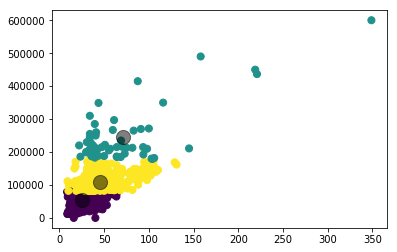

In [6]:
x=data['Жилая'][~np.isnan(data['Жилая'])].values
y=data['Цена'][~np.isnan(data['Цена'])][:x.size].values
array=np.column_stack((x,y))
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(array) #model building
y_kmeans = kmeans.predict(array)

plt.scatter(array[:, 0], array[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Linear regression
#### Showing underpriced apartments
#### Predictor variables: Общая, Квм, Район, Жилая, Этажность, Этаж, Кухня, Балкон, Раздельных
#### Target variable: price

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
realt_data = pd.read_csv('C:/Users/Owner/Desktop/realtXY16.csv');

In [10]:
# categorial variables
params_array = ['Общая','Квм','Район','Жилая','Этажность','Этаж','Кухня','Балкон','Раздельных']
categorial = realt_data.loc[:, params_array]

# convert categorial to indicators
indicator = pd.get_dummies(categorial, columns=params_array, prefix=params_array)

# merge
real_price=realt_data['Цена'].to_frame()

merged_realt_data = pd.merge(real_price, indicator, left_index=True, right_index=True)

model = LinearRegression()

Y = merged_realt_data['Цена']

X = merged_realt_data.drop(columns=['Цена'])

model.fit(X, Y) #model building
print('Коэффициенты регрессии: \n ', model.coef_)

Коэффициенты регрессии: 
  [-6.18303883e+16 -7.96804176e+16 -2.28997334e+15 ... -2.52142500e+04
  3.34115279e+15  3.34115279e+15]


In [11]:
#оценка
merged_realt_data['Предсказанная цена'] = model.predict(X)
condition=merged_realt_data['Цена'] < 0.8 * merged_realt_data['Предсказанная цена']
undervaluated = merged_realt_data[['Предсказанная цена', 'Цена']].loc[condition]
print('Недооценённые квартиры: \n ', undervaluated)

Недооценённые квартиры: 
        Предсказанная цена     Цена
175              21936.0  15000.0
181              25840.0  15900.0
196              26928.0  18000.0
197              30120.0  18000.0
205              27200.0  19000.0
206              33008.0  19000.0
210              26352.0  19000.0
211              30880.0  19000.0
214              27552.0  19500.0
217              25480.0  20000.0
219              25680.0  20000.0
221              26672.0  20000.0
222              27104.0  20000.0
224              31128.0  20000.0
226              31784.0  20500.0
227              33336.0  21000.0
228              32392.0  21000.0
231              31352.0  21000.0
238              34744.0  21500.0
239              35640.0  21700.0
241              29392.0  22000.0
243              42088.0  22500.0
246              42840.0  23000.0
253              34640.0  24000.0
256              47168.0  25000.0
273              37776.0  30000.0
278              41744.0  32000.0
302                75